# FINAL

Kathryn Brusewitz

In [122]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)
import scipy.stats as st

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)
import statsmodels.formula.api as smf
# import statsmodels.api as sm
import sklearn.metrics as sm


from scipy.stats import linregress

from matplotlib.colors import ListedColormap
from sklearn import neighbors

import seaborn as sns
sns.set(style="ticks")

from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error

from sklearn.cross_validation import KFold

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


# 1 Clustering

## 1
Load iris data. It is included both in R and in python (in sklearn).

In [43]:
# Load Iris Data
from sklearn import datasets
iris = datasets.load_iris()

# Dataframes
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
 
# Set colormap
colormap = np.array(['red', 'lime', 'black', 'blue'])

## 2
Make a number of plots where you mark the cluster membership. Note: mark the cluster membership, not the species.

Text(0.5,1,'Predicted Classification')

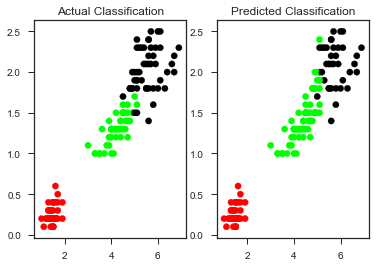

In [57]:
# Build k means clustering model (k = 3)
model = KMeans(n_clusters=3)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

Text(0.5,1,'Predicted Classification')

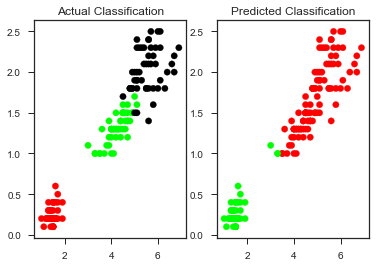

In [62]:
# Build k means clustering model (k = 2)
model = KMeans(n_clusters=2)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

Text(0.5,1,'Predicted Classification')

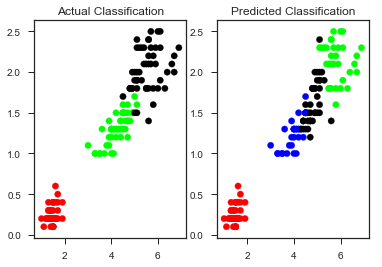

In [70]:
# Build k means clustering model (k = 4)
model = KMeans(n_clusters=4)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

Text(0.5,1,'Predicted Classification')

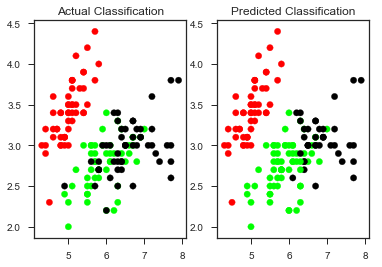

In [71]:
# Build k means clustering model (k = 3)
model = KMeans(n_clusters=3)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

Text(0.5,1,'Predicted Classification')

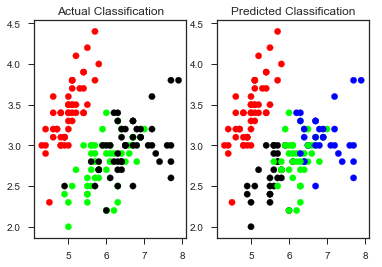

In [96]:
# Build k means clustering model (k = 4)
model = KMeans(n_clusters=4)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

Text(0.5,1,'Predicted Classification')

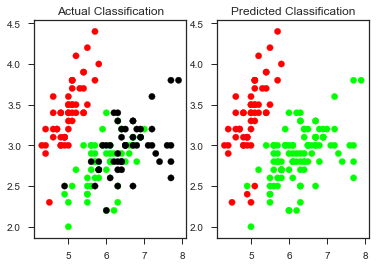

In [98]:
# Build k means clustering model (k = 2)
model = KMeans(n_clusters=2)
model.fit(x)
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
# Plot Predicted
plt.subplot(1, 2, 2)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicted Classification')

## 3 and 4
Based on your plots, choose a single best clustering (no formal computations needed). Let this be your prediction.

Answer: 

- I choose the fourth pair of plots plotted above. 
- Features are Sepal Length and Sepal Width.
- k = 3
- The predicted clustering is extremely close to the actual classification. Though there is some overlap in the middle. 



# Regularization
Here your task will be to estimate Boston house prices (medv) using all other features as predictors. Use ridge regression to avoid over tting, and (10-fold) cross-validate the optimal regularization parameter.

## 1
Load Boston data. It's located in R packages MASS, and in sklearn.

In [160]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

## 2
Select a range of regularization parameters λ. It should span a wide range of values from very small to very large, and contain at least 10 values in this range.

In [164]:
# lambda is the amount of penalty we are introducing to the model
lam = [.0001, .01, .1, 5, 10, 20, 50, 100, 150, 200, 500, 1000, 5000, 10000]

## 3
For each λ, use a linear ridge regression and compute the mean squared error (MSE) by 10-fold cross validation


In [165]:
table = pd.DataFrame(columns=['lambda', 'MSE'])

def MSE(lm, x, y):
    return np.square(y - lm.predict(x)).mean()

i = 0
for a in lam:
    # Create linear regression object with a ridge coefficient 0.5
    ridge = Ridge(fit_intercept=True, alpha=a)

    # Train the model using the training set
    ridge.fit(x,y)
    
    # Compute MSE on training data by 10 fold cross validation
    scores = cross_val_score(ridge, x, y, cv=10, scoring=MSE)
    
    # Push to table
    table.loc[i] = {'lambda': a, 'MSE': scores.mean()}
    i = i +1

## 4
Show a table (or graph) of λ and the corresponding MSE-s. Which λ performs best?

In [166]:
print(table)

        lambda        MSE
0       0.0001  34.762933
1       0.0100  34.747506
2       0.1000  34.624629
3       5.0000  33.613207
4      10.0000  33.055720
5      20.0000  32.131218
6      50.0000  30.545336
7     100.0000  29.627103
8     150.0000  29.421698
9     200.0000  29.452726
10    500.0000  30.463448
11   1000.0000  32.066644
12   5000.0000  38.803607
13  10000.0000  43.489667


Answer: The best lambda in this table is 150, where MSE is 29.421698

# 3 Naive Bayes
Your first task is to take the good old 1984 house voting data, and based on votes, predict who is democrat, who republican. However, you have to implement Naive Bayes yourself. I recommend to consult Schutt & O'Neill (2013), chapter 4 and Daume, chapter 9.3, although just lecture slides should do as well.
Note: you may ignore smoothing here as we have very few features (16).

## 1 
Read in the data (canvas-files-house votes). Ensure you know it's structure.

For Naive Bayes you need a number of frequencies:
- Pr(republican)
- Pr(democrat)
- Pr(voted yes on issue i|republican) for i = 1...16
- Pr(voted yes on issue i|democrat) for i = 1...16
- Pr(voted no on issue i|republican) for i = 1...16
- Pr(voted no on issue i|democrat) for i = 1...16

Just ignore the missings below.

In [93]:
# Load data
data = pd.read_table('house-votes-84.csv', sep=",", header=None)

In [94]:
# View data
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [95]:
dataFreqs = data.drop([0], axis=1).apply(pd.value_counts)

dataFreqs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
?,12,48,11,11,15,11,14,15,22,7,21,31,25,17,28,104
n,236,192,171,247,208,152,182,178,206,212,264,233,201,170,233,62
y,187,195,253,177,212,272,239,242,207,216,150,171,209,248,174,269


## 2
Compute these probabilities. I recommend to create a vector for each of the latter 4 probabilities.

In [96]:
totalR = sum(x == 'republican' for x in data[0])
totalD = sum(x == 'democrat' for x in data[0]) 
total = totalR+totalD

pRep = totalR / total # Pr(republican)
pDem = totalD / total # Pr(democrat)

In [97]:
freqTable = pd.DataFrame(columns=['P(no|dem)', 'P(yes|dem)', 'P(no|rep)', 'P(yes|rep)'])

for i in range(1, 17):
    # Extract party from first column, decisions from ith column
    bill = data[[0, i]]
    no = bill[bill[i] == 'n']
    yes = bill[bill[i] == 'y']
    
    # Get total <party> for a decision
    numR = sum(x == 'republican' for x in bill[0])
    numD = sum(x == 'democrat' for x in bill[0]) 
    
    # What is probability they say __ given they are ___
    dNo = sum(x == 'democrat' for x in no[0])/numD
    dYes = sum(x == 'democrat' for x in yes[0])/numD
    rNo = sum(x == 'republican' for x in no[0])/numR
    rYes = sum(x == 'republican' for x in yes[0])/numR

    # Push to table
    freqTable.loc[i - 1] = {'P(no|dem)': np.round(dNo, 2), 'P(yes|dem)': np.round(dYes, 2), 'P(no|rep)':np.round(rNo, 2), 'P(yes|rep)':np.round(rYes, 2)}

In [98]:
print('P(rep)', np.round(pRep, 2))
print('P(dem)', np.round(pDem, 2))

P(rep) 0.39
P(dem) 0.61


In [99]:
freqTable = freqTable.T

freqTable


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P(no|dem),0.38,0.45,0.11,0.92,0.75,0.51,0.22,0.17,0.22,0.52,0.47,0.80,0.67,0.63,0.34,0.04
P(yes|dem),0.58,0.45,0.87,0.05,0.21,0.46,0.75,0.82,0.70,0.46,0.48,0.13,0.27,0.34,0.60,0.65
P(no|rep),0.80,0.43,0.85,0.01,0.05,0.10,0.73,0.79,0.87,0.43,0.82,0.12,0.13,0.02,0.85,0.30
P(yes|rep),0.18,0.45,0.13,0.97,0.93,0.89,0.23,0.14,0.11,0.55,0.12,0.80,0.81,0.94,0.08,0.57


## 3 
Create prediction of being democrat and being republican for each representative based just on the prior.
Note: if you operate with valid probabilities, obviously Pr(D) = 1 − Pr(R). However, this is not the case if you ignore the normalizer and compute in logarithms.

In [100]:
# Our priors, AKA best guess...
# P(dem): What is the probability that this person is democrat?
# P(rep): What is the probability that this person is republican?

print("Predictions based on just the prior: ")
print('P(rep)', np.round(pRep, 2))
print('P(dem)', np.round(pDem, 2))

Predictions based on just the prior: 
P(rep) 0.39
P(dem) 0.61


Reasoning: Basically, we have no idea what any person is. But we do know that in the entire population of this data, 0.39 are Reps and 0.61 are Dems. Therefore, given any random person in the population, we will always say there is a 39% chance this person is a Rep and 61% chance this person is a Dem.

In [101]:
# Create a table for every person, column for dem and rep
bayesTable = pd.DataFrame(columns=['P(rep)', 'P(dem)'])

# Initialize with first prior
for i in range(0, len(data)):
    bayesTable.loc[i] = {'P(rep)': pRep, 'P(dem)': pDem}

bayesTable

,P(rep),P(dem)
0,0.386207,0.613793
1,0.386207,0.613793
2,0.386207,0.613793
3,0.386207,0.613793
4,0.386207,0.613793
5,0.386207,0.613793
6,0.386207,0.613793
7,0.386207,0.613793
8,0.386207,0.613793
9,0.386207,0.613793


# 4
Now update the information, vote by vote: for each vote take the corresponding conditional proba- bility, and update the Bayes estimate accordingly.


In [102]:
for i in range(0, len(bayesTable)): 
    
    # update the P(rep) column in bayesTable
    # there are 16 issues in data
    for j in range(0, 16):
        
        # get prior
        prior = bayesTable.at[i,'P(rep)']
        
        voteOnIssue = data.at[i, j+1]
        
        if (voteOnIssue == '?'):
            break; # skip using this vote
        
        # get freq of this vote on this issue
        pData = dataFreqs.at[voteOnIssue, j+1]
        
        pCond = 0
        
        # get corresponding conditional probability
        if (voteOnIssue == 'n'):
            noDem = freqTable.at['P(no|dem)', j]
            noRep = freqTable.at['P(no|rep)', j]
            pCond = noDem if noDem > noRep else noRep
        if (voteOnIssue == 'y'):
            yesDem = freqTable.at['P(yes|dem)', j]
            yesRep = freqTable.at['P(yes|rep)', j]
            pCond = yesDem if yesDem > yesRep else yesRep
        
        pPost = (pCond*prior)/pData
        
        # Store posterior probability 
        bayesTable.at[i,'P(rep)'] = pPost
    
    # update the P(dem) column in bayesTable
    # there are 16 issues in data
    for j in range(0, 16):
        
        # get prior
        prior = bayesTable.at[i,'P(dem)']
        
        voteOnIssue = data.at[i, j+1]
        
        if (voteOnIssue == '?'):
            break; # skip using this vote
        
        # get freq of this vote on this issue
        pData = dataFreqs.at[voteOnIssue, j+1]
        
        pCond = 0
        
        # get corresponding conditional probability
        if (voteOnIssue == 'n'):
            noDem = freqTable.at['P(no|dem)', j]
            noRep = freqTable.at['P(no|rep)', j]
            pCond = noDem if noDem > noRep else noRep
        if (voteOnIssue == 'y'):
            yesDem = freqTable.at['P(yes|dem)', j]
            yesRep = freqTable.at['P(yes|rep)', j]
            pCond = yesDem if yesDem > yesRep else yesRep
        
        pPost = (pCond*prior)/pData
        
        # Store posterior probability 
        bayesTable.at[i,'P(dem)'] = pPost
    
    

# 5
After including information about all 16 votes, you have your prediction. Print the confusion matrix, and calculate accuracy, precision and recall.

In [103]:
bayesTable

,P(rep),P(dem)
0,2.261439e-25,3.594073e-25
1,1.696388e-37,2.696045e-37
2,3.862069e-01,6.137931e-01
3,3.869595e-11,6.149892e-11
4,2.998956e-28,4.766199e-28
5,1.337007e-40,2.124887e-40
6,2.323205e-30,3.692236e-30
7,3.412733e-35,5.423808e-35
8,4.099079e-40,6.514607e-40
9,4.977025e-36,7.909915e-36


In [104]:
classifyTable = pd.DataFrame(columns=['predicted'])

for i in range(0, len(bayesTable)):
    rep = bayesTable.at[i, 'P(rep)']
    dem = bayesTable.at[i, 'P(dem)']
    
    party = 'republican' if rep > dem else 'democrat'
    
    # store predicted party into classifyTable
    classifyTable.loc[i] = {'predicted': party}

classifyTable

,predicted
0,democrat
1,democrat
2,democrat
3,democrat
4,democrat
5,democrat
6,democrat
7,democrat
8,democrat
9,democrat


In [111]:
confusion_matrix(data[0], classifyTable['predicted'])

array([[267,   0],
       [168,   0]])

In [121]:
print('Precision: ', precision_score(data[0], classifyTable['predicted'], average='macro'))
print('Recall: ', recall_score(data[0], classifyTable['predicted'], average='macro'))
print('Accuracy: ', accuracy_score(data[0], classifyTable['predicted']))

Precision:  0.306896551724
Recall:  0.5
Accuracy:  0.613793103448


/Users/kathryn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
